### Lab 15: Using Scikit-Learn for Decision Tree Modelling

In this lab, we use scikit-learn to build decision tree models that will predict whether
a song is Rock, Pop, or Hip-Hop.

In [157]:
# imports
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

import numpy as np

In [158]:
# Read training and test data.  Split both into X (features) and y (classes)
train = pd.read_csv('spotify_train.csv')
X_train = train.iloc[:, :-1]
y_train = train.track_genre

test = pd.read_csv('spotify_test.csv')
X_test = test.iloc[:, :-1]
y_test = test.track_genre



In [159]:
# Can we do better by not overfitting?

best_accuracies = []

for max_depth in range(1, 30):

    # Create a model object
    clf = DecisionTreeClassifier(random_state=1234, criterion = 'entropy', splitter='best', max_depth=max_depth)


    # Train the model
    clf = clf.fit(X=X_train, y = y_train)

    # Predict the classes
    y_pred = clf.predict(X_test)

    # Print model accuracy
    print("Depth: ", max_depth, "Best Split Accuracy: ", metrics.accuracy_score(y_test, y_pred))
    
    best_accuracies.append(metrics.accuracy_score(y_test, y_pred))
    
    
    
    
rnd_accuracies = []

for max_depth in range(1, 30):

    # Create a model object
    clf = DecisionTreeClassifier(criterion = 'entropy', splitter='random', max_depth=max_depth)


    # Train the model
    clf = clf.fit(X=X_train, y = y_train)

    # Predict the classes
    y_pred = clf.predict(X_test)
    # print(type(y_pred), y_pred.shape)

    # Print model accuracy
    #print("Depth: ", max_depth, "Random Split Accuracy: ", metrics.accuracy_score(y_test, y_pred))
    
    rnd_accuracies.append(metrics.accuracy_score(y_test, y_pred))    


Depth:  1 Best Split Accuracy:  0.535
Depth:  2 Best Split Accuracy:  0.648
Depth:  3 Best Split Accuracy:  0.702
Depth:  4 Best Split Accuracy:  0.704
Depth:  5 Best Split Accuracy:  0.725
Depth:  6 Best Split Accuracy:  0.747
Depth:  7 Best Split Accuracy:  0.721
Depth:  8 Best Split Accuracy:  0.745
Depth:  9 Best Split Accuracy:  0.76
Depth:  10 Best Split Accuracy:  0.755
Depth:  11 Best Split Accuracy:  0.748
Depth:  12 Best Split Accuracy:  0.751
Depth:  13 Best Split Accuracy:  0.753
Depth:  14 Best Split Accuracy:  0.746
Depth:  15 Best Split Accuracy:  0.747
Depth:  16 Best Split Accuracy:  0.746
Depth:  17 Best Split Accuracy:  0.742
Depth:  18 Best Split Accuracy:  0.745
Depth:  19 Best Split Accuracy:  0.75
Depth:  20 Best Split Accuracy:  0.752
Depth:  21 Best Split Accuracy:  0.752
Depth:  22 Best Split Accuracy:  0.752
Depth:  23 Best Split Accuracy:  0.752
Depth:  24 Best Split Accuracy:  0.752
Depth:  25 Best Split Accuracy:  0.752
Depth:  26 Best Split Accuracy:  0.7

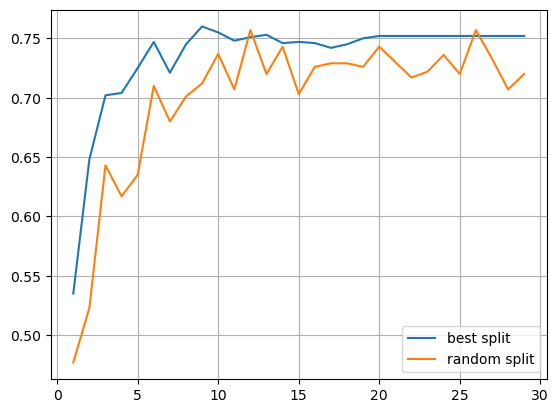

In [160]:

plt.plot(range(1,30), best_accuracies, label='best split')
plt.plot(range(1,30), rnd_accuracies, label='random split')
plt.legend()
plt.grid()

In [177]:
# A little experiment - Create 1000 "random split"  decision trees 

ensemble_size = 500
max_depth = 10

predictions = []


clfs = [DecisionTreeClassifier(criterion = 'entropy', splitter='random', max_depth=max_depth) 
        for _ in range(ensemble_size)]

for i in range(ensemble_size):
    clfs[i].fit(X=X_train, y = y_train)
    y_pred = clfs[i].predict(X_test)
    predictions.append(y_pred)
    
arr = np.array(predictions)

print(arr.shape)


(500, 1000)


In [178]:
# The predictions for test case 0

# print(arr[0, :])

# The prediction counts
from collections import Counter
c = Counter(arr[:,0])
print(c)

# The majority class
print(c.most_common(1))

# The actual class
print(y_test[0])

Counter({'pop': 483, 'rock': 17})
[('pop', 483)]
pop


In [179]:
# The majority prediction for each of the <ensemble_size> decision trees
y_pred = []
for i in range(arr.shape[1]):
    c = Counter(arr[:,i])
    cls = c.most_common(1)[0][0]
    y_pred.append(cls)
    
y_pred = np.array(y_pred)
y_pred

array(['pop', 'pop', 'rock', 'pop', 'rock', 'pop', 'pop', 'rock', 'pop',
       'rock', 'rock', 'pop', 'rock', 'rock', 'pop', 'pop', 'hip-hop',
       'hip-hop', 'hip-hop', 'pop', 'pop', 'hip-hop', 'hip-hop',
       'hip-hop', 'rock', 'pop', 'rock', 'hip-hop', 'rock', 'rock',
       'hip-hop', 'hip-hop', 'rock', 'hip-hop', 'rock', 'hip-hop', 'pop',
       'rock', 'hip-hop', 'pop', 'rock', 'rock', 'pop', 'rock', 'hip-hop',
       'pop', 'hip-hop', 'rock', 'hip-hop', 'hip-hop', 'pop', 'pop',
       'pop', 'pop', 'rock', 'pop', 'pop', 'rock', 'pop', 'hip-hop',
       'rock', 'pop', 'hip-hop', 'rock', 'rock', 'rock', 'pop', 'hip-hop',
       'rock', 'pop', 'hip-hop', 'rock', 'hip-hop', 'hip-hop', 'hip-hop',
       'hip-hop', 'rock', 'hip-hop', 'pop', 'pop', 'pop', 'pop',
       'hip-hop', 'rock', 'rock', 'hip-hop', 'hip-hop', 'pop', 'hip-hop',
       'pop', 'hip-hop', 'pop', 'pop', 'rock', 'rock', 'pop', 'pop',
       'hip-hop', 'hip-hop', 'rock', 'hip-hop', 'rock', 'rock', 'hip-hop',
    

In [180]:
# What is our new accuracy for 500 random-split decision trees?
print("Depth: ", max_depth, metrics.accuracy_score(y_test, y_pred))

Depth:  10 0.81
